Final Project - Sepideh Forouzi

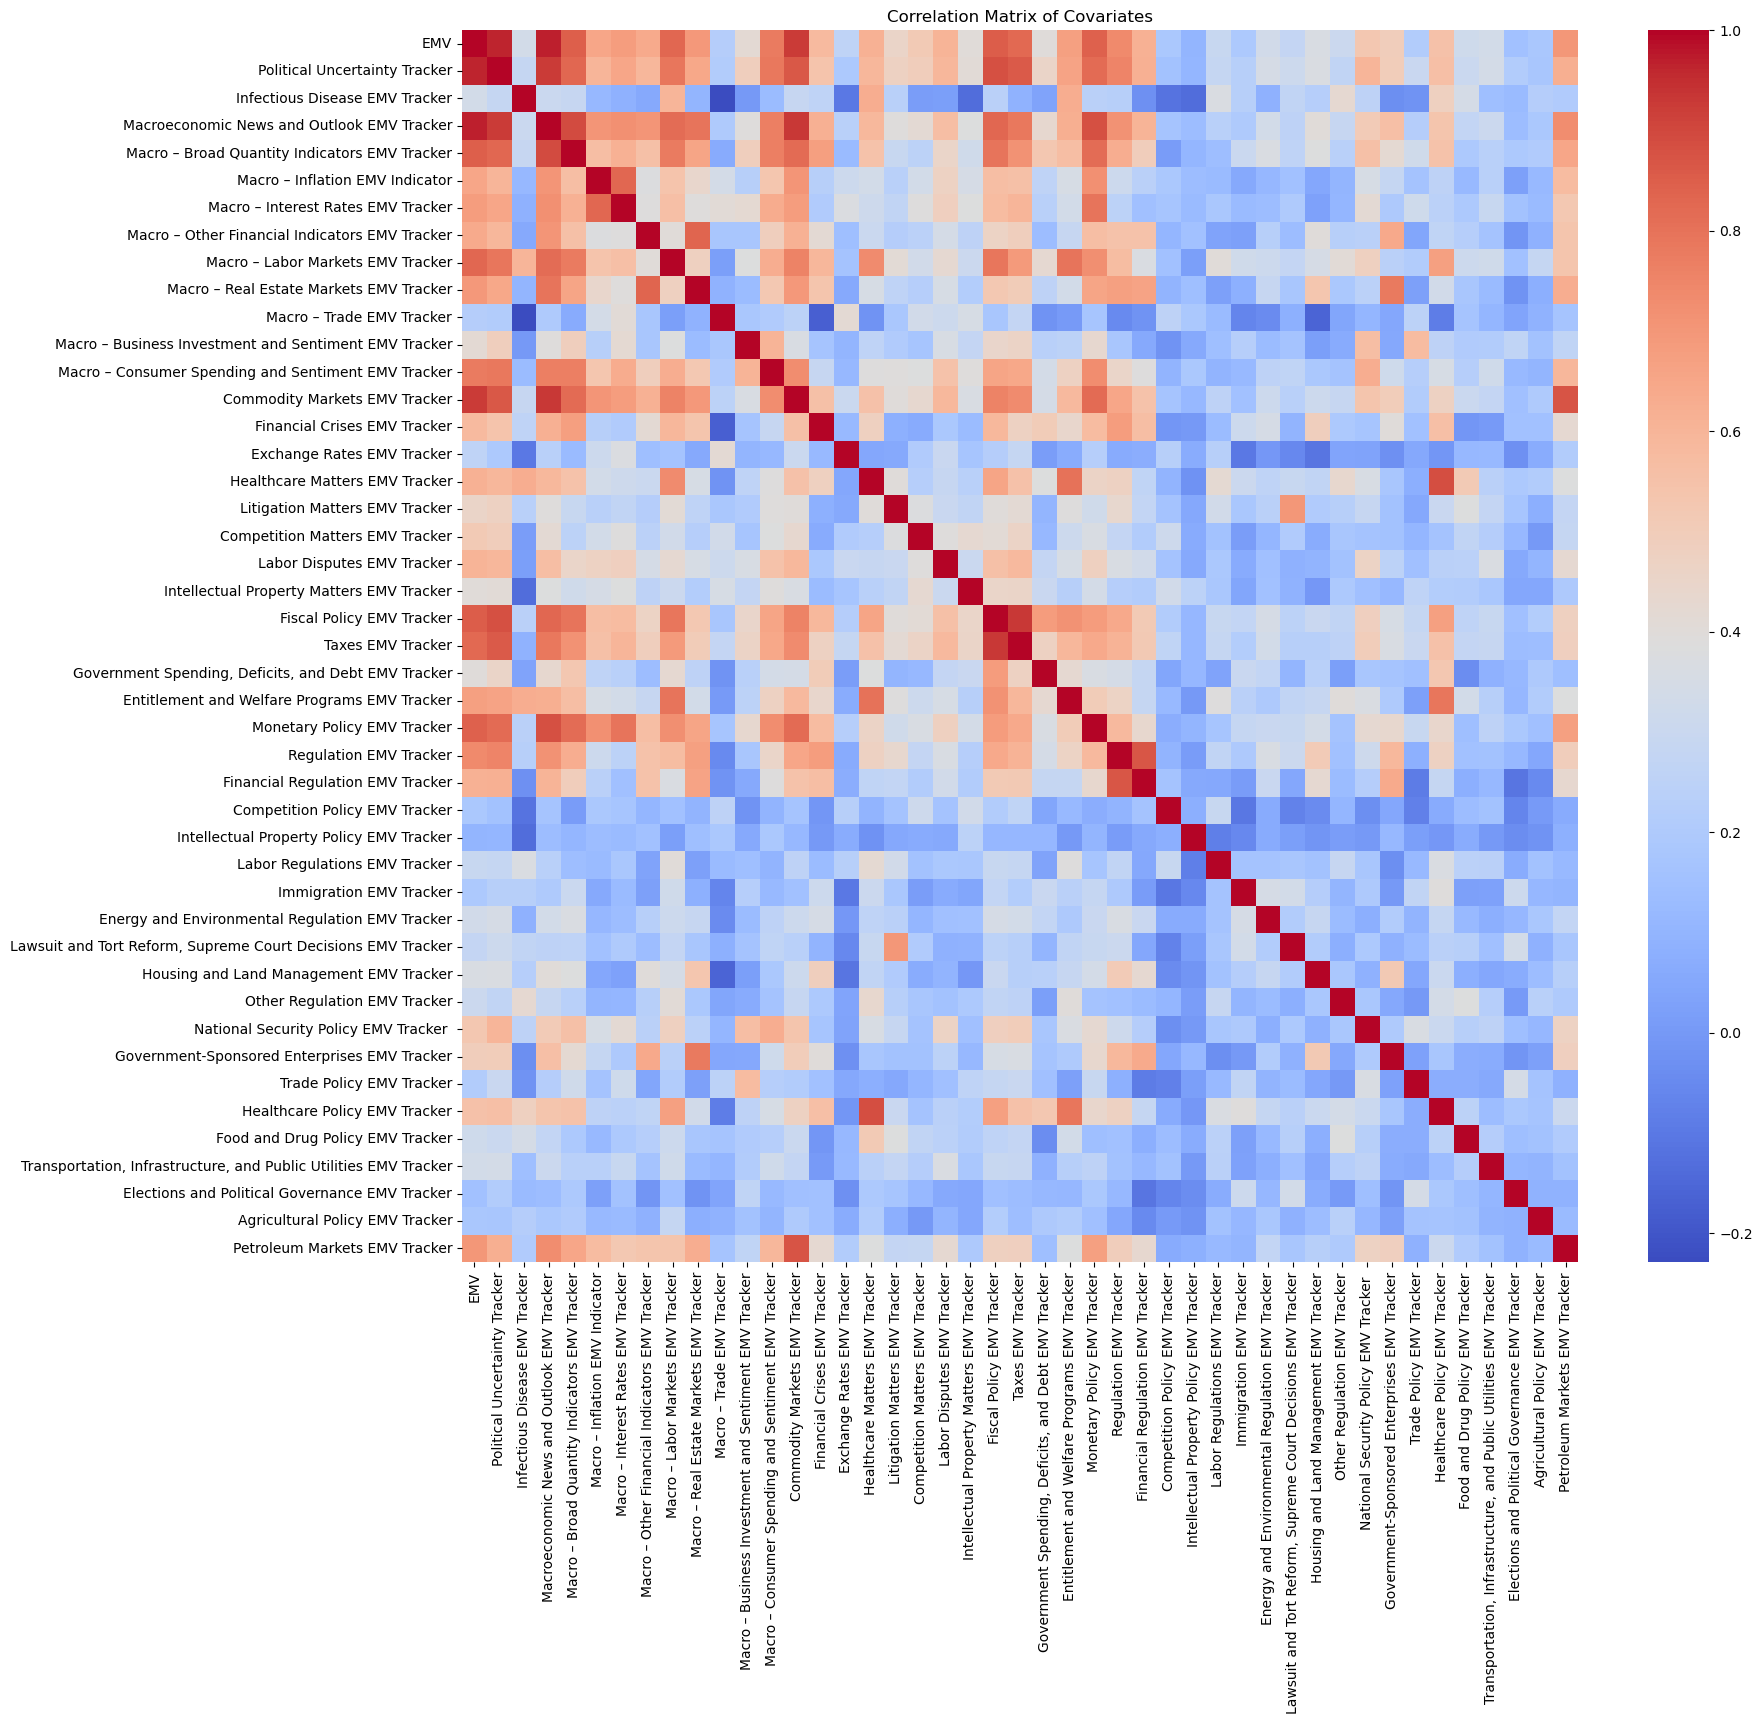

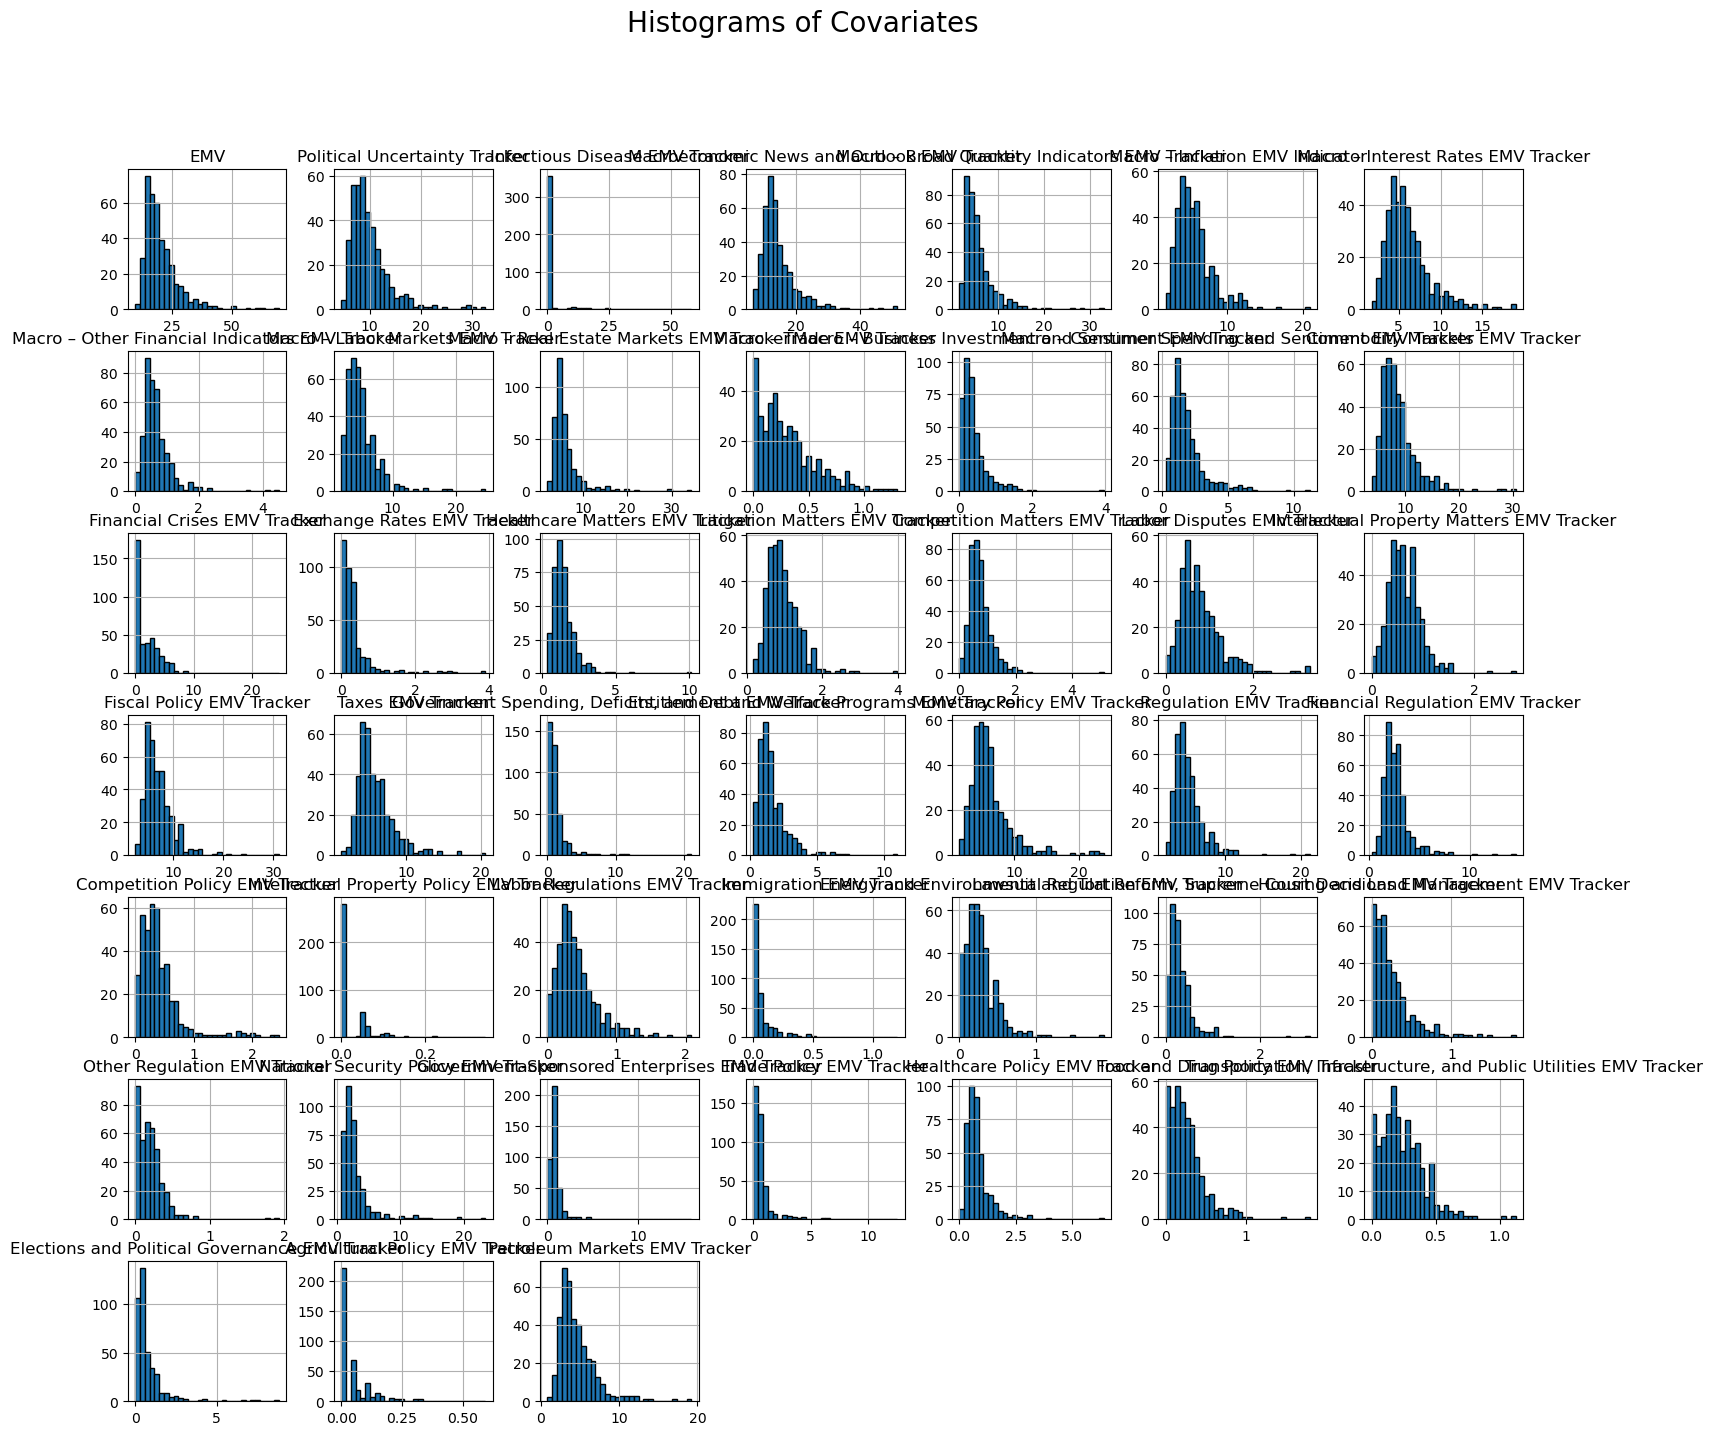

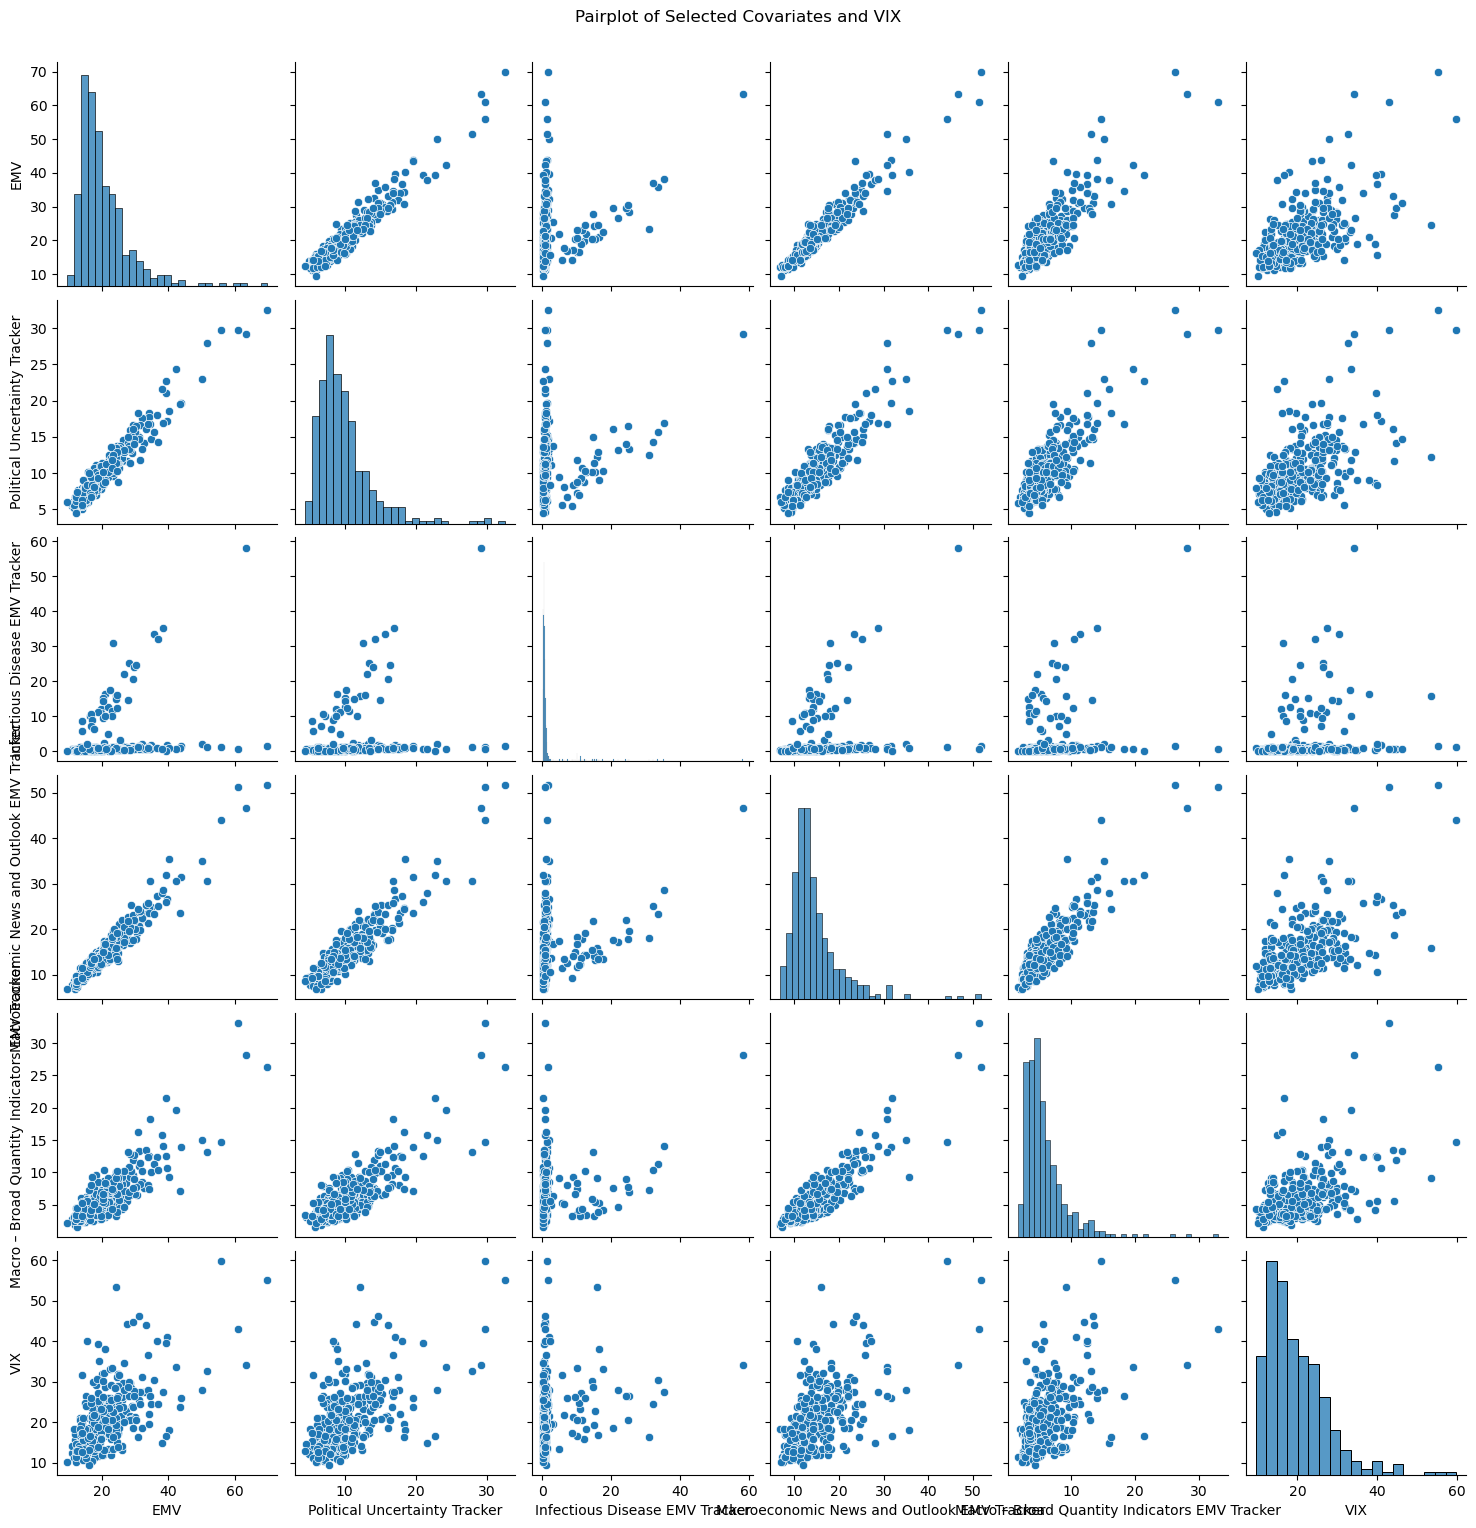

OLS CVM: 31.6949
Ridge CVM: 32.6938, R2: 0.4839
LASSO CVM: 32.6106, R2: 0.4672
Elastic Net CVM: 32.6106, R2: 0.4672


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_excel("./EMV_VIX_Data.xlsx")

# Separate features and target
y = data['VIX'].values
X = data.drop(columns=['Date', 'VIX']).values
X_df = data.drop(columns=['Date', 'VIX'])

# ------------------- EDA -------------------
# Correlation Matrix
corr_matrix = X_df.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Covariates')
plt.show()

# Distribution of Covariates
X_df.hist(figsize=(18, 16), bins=30, edgecolor='black')
plt.suptitle('Histograms of Covariates', fontsize=20)
plt.show()

# Pair Plots (Optional: Only for a subset if too many variables)
subset_cols = X_df.columns[:5]  # change 5 to any reasonable number for visual clarity
sns.pairplot(data[subset_cols.tolist() + ['VIX']])
plt.suptitle('Pairplot of Selected Covariates and VIX', y=1.02)
plt.show()

# ------------------- OLS Model -------------------
ols_model = LinearRegression().fit(X, y)
ols_coefs = ols_model.coef_

# 5-Fold CV for OLS
kf = KFold(n_splits=5, shuffle=True, random_state=1)
mmse_ols = []
for t in range(50):
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model = LinearRegression().fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mmse_ols.append(mean_squared_error(y_test, y_pred))
cvm_ols = np.mean(mmse_ols)

# ------------------- Ridge Regression -------------------
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 500), scoring='neg_mean_squared_error', cv=5).fit(X, y)
ridge_lambda_min = ridge_cv.alpha_

mmse_ridge = []
for t in range(50):
    X_shuffled, y_shuffled = shuffle(X, y, random_state=1)
    kf = KFold(n_splits=5)
    for train_idx, test_idx in kf.split(X_shuffled):
        X_train, X_test = X_shuffled[train_idx], X_shuffled[test_idx]
        y_train, y_test = y_shuffled[train_idx], y_shuffled[test_idx]
        model = Ridge(alpha=ridge_lambda_min).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mmse_ridge.append(mean_squared_error(y_test, y_pred))
cvm_ridge = np.mean(mmse_ridge)
r2_ridge = r2_score(y, ridge_cv.predict(X))

# ------------------- LASSO Regression -------------------
lasso_cv = LassoCV(alphas=np.logspace(-6, 6, 500), cv=5, random_state=1).fit(X, y)
lasso_lambda_min = lasso_cv.alpha_

mmse_lasso = []
for t in range(50):
    X_shuffled, y_shuffled = shuffle(X, y, random_state=1)
    kf = KFold(n_splits=5)
    for train_idx, test_idx in kf.split(X_shuffled):
        X_train, X_test = X_shuffled[train_idx], X_shuffled[test_idx]
        y_train, y_test = y_shuffled[train_idx], y_shuffled[test_idx]
        model = Lasso(alpha=lasso_lambda_min).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mmse_lasso.append(mean_squared_error(y_test, y_pred))
cvm_lasso = np.mean(mmse_lasso)
r2_lasso = r2_score(y, lasso_cv.predict(X))

# ------------------- Elastic Net Regression -------------------
elastic_cv = ElasticNetCV(l1_ratio=np.linspace(0.01, 1.0, 50), alphas=np.logspace(-6, 6, 500), cv=5, random_state=1).fit(X, y)
elastic_lambda_min = elastic_cv.alpha_
elastic_l1_ratio = elastic_cv.l1_ratio_

mmse_elastic = []
for t in range(50):
    X_shuffled, y_shuffled = shuffle(X, y, random_state=1)
    kf = KFold(n_splits=5)
    for train_idx, test_idx in kf.split(X_shuffled):
        X_train, X_test = X_shuffled[train_idx], X_shuffled[test_idx]
        y_train, y_test = y_shuffled[train_idx], y_shuffled[test_idx]
        model = ElasticNet(alpha=elastic_lambda_min, l1_ratio=elastic_l1_ratio).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mmse_elastic.append(mean_squared_error(y_test, y_pred))
cvm_elastic = np.mean(mmse_elastic)
r2_elastic = r2_score(y, elastic_cv.predict(X))

# ------------------- Final Outputs -------------------
print(f"OLS CVM: {cvm_ols:.4f}")
print(f"Ridge CVM: {cvm_ridge:.4f}, R2: {r2_ridge:.4f}")
print(f"LASSO CVM: {cvm_lasso:.4f}, R2: {r2_lasso:.4f}")
print(f"Elastic Net CVM: {cvm_elastic:.4f}, R2: {r2_elastic:.4f}")
